In [2]:
import zipfile
import os

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [4]:

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

#reference_number
def get_reference_number(soup):
    """
    Extracts the reference number from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: Reference number or an empty string if not found.
    """
    try:
        reference_number = soup.find('h2', attrs={'single-product-attr'})
        reference_number_string = reference_number.text.strip()
    except AttributeError:
        reference_number_string = ""
    return reference_number_string
#Watch_URL
def get_Watch_URL(soup):
    """
    Extracts the Watch URL from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: Watch URL or 'N/A' if not found.
    """
    try:
        
        watch_url = soup.find("a", attrs={'class': "nm-shop-loop-title-link woocommerce-LoopProduct-link"})
        if watch_url:
            return watch_url.get("href")

        else:
            return "N/A"
    except AttributeError:
        return "N/A"


#type      
def get_gender(soup):
    """
    Extracts the gender type from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: Gender type or 'N/A' if not found.
    """
    try:
        type = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Gender") + p.tabs-attr-subtitle')
        if type:
            return type.text.strip() + " Watches"
        else:
            return "N/A"
    except AttributeError:
        return "N/A"

#brand
def get_brand(soup):
    try:
        brand ="Louis Erard"

        return brand
    except AttributeError:
        return "N/A" 

#year_introduced
def get_year_introduced(soup):
    try:
        year_introduced =""

        return year_introduced
    except AttributeError:
        return "N/A" 


#parent_model
def get_parent_model(soup):
    try:
        parent_model_ele = soup.select_one("#nm-breadcrumb > a:nth-child(5)")
        parent_model = parent_model_ele.get_text(strip=True) if parent_model_ele else ""
    except AttributeError:
        return "N/A"
    return parent_model



    
#specific_model
def get_specific_model(soup):
    try:
        parent_model_ele = soup.select_one("#nm-breadcrumb > a:nth-child(5)")
        parent_model = parent_model_ele.get_text(strip=True) if parent_model_ele else ""
        
        product_title_ele = soup.find("h1", attrs={'class': 'single-product-small-title'})
        product_title = product_title_ele.text.strip() if product_title_ele else ""
        
        specific_model = f"{parent_model} {product_title}"
    except AttributeError:
        return "N/A"
    return specific_model






    

#nickname     
def get_nickname(soup):
    try:
        nickname =""

        return nickname
    except AttributeError:
        return "N/A"     




#marketing_name
def get_marketing_name(soup):
    """
    Extracts the marketing name from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: marketing name or an empty string if not found.
    """
    try:
        marketing_name = soup.find('div', attrs={'additional-features'}).text.strip()
        marketing_value = marketing_name 
    except AttributeError:
        marketing_value = ""
    return marketing_value
#style
def get_style(soup):
    try:
        style =""

        return style
    except AttributeError:
        return "N/A"  
    
#currency
def get_currency(soup):
    try:
        currency = soup.find("span", attrs={'class':'woocommerce-Price-currencySymbol'}).text.strip()
    except AttributeError:
        currency = "N/A"
    return currency



#price
def get_price(soup):
    try:
        price_element = soup.find("span", class_="woocommerce-Price-amount")  # Find the price element
        price_text = price_element.bdi.get_text(strip=True)  # Extract the price value
        # Remove currency symbol and any non-numeric characters
        price_text_cleaned = price_text.replace("CHF", "").replace(",", "")
        price = float(price_text_cleaned)  # Convert to float
    except AttributeError:
        price = None  # Use None instead of "N/A" for consistency
    return f"{price:.2f}" if price is not None else "N/A"



        
        
        



#image_URL
def get_image_URL(soup):
    try:
        # Find all image tags within the specified class
        image_tags = soup.find_all('div', {'class': 'iconic-woothumbs-images__slide'})

        # Check if any image tags were found
        if image_tags:
            # Get the first image tag
            image_tag = image_tags[0].find('img')
            image_URL = image_tag['src']
            return image_URL
        else:
            # Handle the case when no image tags are found
            return "No image URL found"
    except IndexError:
        # Handle the IndexError (list index out of range)
        return "Error: Image list index out of range"





#made_in
def get_made_in(soup):
    try:
        made_in ="Switzerland"

        return made_in
    except AttributeError:
        return "N/A"  




#case_shape
def get_case_shape(soup):
    try:
        case_shape =" "

        return case_shape
    except AttributeError:
        return "N/A"  




#case_material
def get_case_material(soup):
    """
    Extracts the case material from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: Case material or 'N/A' if not found.
    """
    try:
        case_material_subtitle = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Case Material") + p.tabs-attr-subtitle')
        if case_material_subtitle:
            return case_material_subtitle.text.strip()
        else:
            return "N/A"
    except AttributeError:
        return "N/A"


#case_finish
def get_case_finish(soup):
    try:
        case_finish =" "

        return case_finish
    except AttributeError:
        return "N/A"  



#Case Back

def get_case_Back(soup):
    try:
        case_back = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Case Back") + p.tabs-attr-subtitle')
        if case_back:
            return case_back.text.strip()
        else:
            return "N/A"
    except AttributeError:
        return "N/A"     
            
#diameter
def get_diameter(soup):
    try:
        diameter = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Case Diameter") + p.tabs-attr-subtitle')
        if diameter:
            return diameter.text.strip()
        else:
            return "N/A"
    except AttributeError:
        return "N/A" 

#between_lugs        

def get_between_lugs(soup):
    try:
        # Find the subtitle related to strap dimensions
        strap_dimensions_subtitle = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Strap Dimensions") + p.tabs-attr-subtitle')
        
        if strap_dimensions_subtitle:
            # Extract the text content of the subtitle
            between_lugs = strap_dimensions_subtitle.text.strip().split(',')[0]
            # Split the subtitle by comma and get the part before the comma
            return between_lugs
        else:
            # If no subtitle is found, return "N/A"
            return "N/A"
    except AttributeError:
        # Handle cases where the attribute is not found
        return "N/A"


#lug_to_lug

def get_lug_to_lug(soup):
    try:
        lug_to_lug =" "

        return lug_to_lug
    except AttributeError:
        return "N/A"  


#case_thickness
def get_case_thickness(soup):
    try:
        case_thickness =" "

        return case_thickness
    except AttributeError:
        return "N/A"  


#bezel_material
def get_bezel_material(soup):
    try:
        bezel_material =" "

        return bezel_material
    except AttributeError:
        return "N/A"  


#bezel_color
def get_bezel_color(soup):
    try:
        bezel_color =" "

        return bezel_color
    except AttributeError:
        return "N/A"  



 #crystal
def get_case_Glass(soup):
    """
    Extracts the Glass from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: Glass or 'N/A' if not found.
    """
    try:
        crystal = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Glass") + p.tabs-attr-subtitle')
        if crystal:
            return crystal.text.strip()
        else:
            return "N/A"
    except AttributeError:
        return "N/A"
        

#water_resistance
def get_case_Water_resistance(soup):
    """
    Extracts the Water resistance from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: Water resistance or 'N/A' if not found.
    """
    try:
        Water_resistance = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Water resistance") + p.tabs-attr-subtitle')
        if Water_resistance:
            return Water_resistance.text.strip()
        else:
            return "N/A"
    except AttributeError:
        return "N/A"

#weight
def get_weight(soup):
    try:
        weight =" "

        return weight
    except AttributeError:
        return "N/A" 


#dial_color
def get_dial_color(soup):
    """
    Extracts the Water resistance from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: Water resistance or 'N/A' if not found.
    """
    try:
        dial_color = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Dial") + p.tabs-attr-subtitle')
        if dial_color:
            return dial_color.text.strip()
        else:
            return "N/A"
    except AttributeError:
        return "N/A"

#numerals
def get_numerals(soup):
    try:
        numerals =" "

        return numerals
    except AttributeError:
        return "N/A" 


#bracelet_material
def get_Strap_bracelet_material(soup):
    """
    Extracts the bracelet material from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: bracelet material or 'N/A' if not found.
    """
    try:
        bracelet_material = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Strap") + p.tabs-attr-subtitle')
        if bracelet_material:
            return bracelet_material.text.strip()
        else:
            return "N/A"
    except AttributeError:
        return "N/A"
#bracelet_color
def get_Strap_bracelet_color(soup):
    """
    Extracts the bracelet color from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: bracelet color or 'N/A' if not found.
    """
    try:
        bracelet_color = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Strap") + p.tabs-attr-subtitle')
        if bracelet_color:
            return bracelet_color.text.strip()
        else:
            return "N/A"
    except AttributeError:
        return "N/A"
#clasp_type
def get_Strap_clasp_type(soup):
    """
    Extracts the clasp type from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: clasp type or 'N/A' if not found.
    """
    try:
        clasp_type = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Buckle") + p.tabs-attr-subtitle')
        if clasp_type:
            return clasp_type.text.strip()
        else:
            return "N/A"
    except AttributeError:
        return "N/A"
#movement
def get_movement(soup):
    """
    Extracts the movement from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: movement or 'N/A' if not found.
    """
    try:
        movement = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Movement") + p.tabs-attr-subtitle')
        if movement:
            return movement.text.strip()
        else:
            return "N/A"
    except AttributeError:
        return "N/A"
#caliber
def get_movement_caliber(soup):
    """
    Extracts the caliber from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: caliber or 'N/A' if not found.
    """
    try:
        Calibre = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Calibre") + p.tabs-attr-subtitle')
        if Calibre:
            return Calibre.text.strip()
        else:
            return "N/A"
    except AttributeError:
        return "N/A"
#power_reserve
def get_movement_power_reserve(soup):
    """
    Extracts the power reserve from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: power reserve or 'N/A' if not found.
    """
    try:
        power_reserve = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Power Reserve") + p.tabs-attr-subtitle')
        if power_reserve:
            return power_reserve.text.strip()
        else:
            return "N/A"
    except AttributeError:
        return "N/A"

#frequency
def get_frequency(soup):
    try:
        frequency =" "

        return frequency
    except AttributeError:
        return "N/A" 



#jewels
def get_jewels(soup):
    try:
        jewels =" "

        return jewels
    except AttributeError:
        return "N/A" 



#features
def get_movement_Functions(soup):
    """
    Extracts the Functions from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: Functions or 'N/A' if not found.
    """
    try:
        features = soup.select_one('div.custom-tabs-attr-item p.tabs-attr-title:-soup-contains("Functions") + p.tabs-attr-subtitle')
        if features:
            return features.text.strip()
        else:
            return "N/A"
    except AttributeError:
        return "N/A"
#description
def get_description(soup):
    """
    Extracts the product description from the soup object.

    Args:
        soup: BeautifulSoup object representing the webpage content.

    Returns:
        str: Product description or an empty string if not found.
    """
    try:
        description = soup.find('div', attrs={'woocommerce-product-details__short-description entry-content'})
        description_value = description.text.strip()
    except AttributeError:
        description_value = ""
    return description_value

#short_description
def get_short_description(soup):
    try:
        short_description =" "

        return short_description
    except AttributeError:
        return "N/A" 



    #########################################
if __name__ == '__main__':
    # Add your user agent
    HEADERS = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36 Edg/122.0.0.0', 'Accept-Language': 'en-US, en;q=0.5'}

    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome()#service=service, options=options
    URL = "https://louiserard.com/creations/?v=baa904278574&size-attr=39-mm,40-mm,42-mm,42-5-mm,43-mm,44-mm" # Navigate to the URL
    driver.get(URL)
    driver.execute_script("window.scrollBy(0, 500);") 
    wait = WebDriverWait(driver, 60)
    try:
        for _ in range(1):
            element = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="nm-shop-browse-wrap"]/div[3]/a[1]')))
            print(element)
            print("Now element is clickable")
            # Click the element
        element.click()
        time.sleep(10)
    except Exception as e:
        print("Error:", e)
            
            
        
            
                
        
        
    

    page_source = driver.page_source # Get the page source (HTML) using Selenium

    soup = BeautifulSoup(page_source, "html.parser")



    # Find the links
    links = soup.find_all("a", attrs={'class': "nm-shop-loop-title-link woocommerce-LoopProduct-link"})
    links_list = [link.get('href') for link in links]




    for link in links:
        links_list.append(link.get('href'))

    d = {"reference_number": [],"Watch_URL":[], "type":[],"brand":[],"year_introduced":[],"parent_model":[],"specific_model":[],"nickname":[],
         "marketing_name":[],"style":[],"currency":[],
         "price":[],"image_URL":[],"made_in":[],"case_shape":[],"case_material":[],"case_finish":[],"case_back":[],"diameter":[],"between_lugs":[],
         "lug_to_lug":[],"case_thickness":[],"bezel_material":[],"bezel_color":[],"crystal":[],
         "Water_resistance":[],"weight":[],"dial_color":[],"numerals":[],"bracelet_material":[],"bracelet_color":[],"clasp_type":[],"movement":[],
         "Calibre":[],"power_reserve":[],"frequency":[],"jewels":[],"features":[],"description":[],"short_description":[]}
# Process each link
for link in links_list:
    # Navigate to the link using Selenium
    driver.get(link)
    new_page_source = driver.page_source
    new_soup = BeautifulSoup(new_page_source, "html.parser")

    # Extract relevant information and populate your dictionary
    d['reference_number'].append(get_reference_number(new_soup))
    d['Watch_URL'].append(get_Watch_URL(new_soup))
    d['type'].append(get_gender(new_soup))
    d['brand'].append(get_brand(new_soup))
    d['year_introduced'].append(get_year_introduced(new_soup))
    d['parent_model'].append(get_parent_model(new_soup))
    d['specific_model'].append(get_specific_model(new_soup))
    d['nickname'].append(get_nickname(new_soup))
    d['marketing_name'].append(get_marketing_name(new_soup))
    d['style'].append(get_style(new_soup))
    d['currency'].append(get_currency(new_soup))
    d['price'].append(get_price(new_soup))
    d['image_URL'].append(get_image_URL(new_soup))
    d['made_in'].append(get_made_in(new_soup))
    d['case_shape'].append(get_case_shape(new_soup))
    d['case_material'].append(get_case_material(new_soup))
    d['case_finish'].append(get_case_finish(new_soup))
    d['case_back'].append(get_case_Back(new_soup))
    d['diameter'].append(get_diameter(new_soup))
    d['between_lugs'].append(get_between_lugs(new_soup))
    d['lug_to_lug'].append(get_lug_to_lug(new_soup))
    d['case_thickness'].append(get_case_thickness(new_soup))
    d['bezel_material'].append(get_bezel_material(new_soup))
    d['bezel_color'].append(get_bezel_color(new_soup))
    d['crystal'].append(get_case_Glass(new_soup))
    d['Water_resistance'].append(get_case_Water_resistance(new_soup))
    d['weight'].append(get_weight(new_soup))
    d['dial_color'].append(get_dial_color(new_soup))
    d['numerals'].append(get_numerals(new_soup))
    d['bracelet_material'].append(get_Strap_bracelet_material(new_soup))
    d['bracelet_color'].append(get_Strap_bracelet_color(new_soup))
    d['clasp_type'].append(get_Strap_clasp_type(new_soup))
    d['movement'].append(get_movement(new_soup))
    d['Calibre'].append(get_movement_caliber(new_soup))
    d['power_reserve'].append(get_movement_power_reserve(new_soup))
    d['frequency'].append(get_frequency(new_soup))
    d['jewels'].append(get_jewels(new_soup))
    d['features'].append(get_movement_Functions(new_soup))
    d['description'].append(get_description(new_soup))
    d['short_description'].append(get_short_description(new_soup))

# Close the WebDriver when done
#driver.quit()


 

louiserard_df = pd.DataFrame.from_dict(d)
louiserard_df.drop_duplicates(inplace=True)

# Save the DataFrame to a CSV file
csv_file_path = r"C:**\LouisErard_Group 3.csv"
louiserard_df.to_csv(csv_file_path, header=True, index=False)

# Specify the desired name for the ZIP file
zip_file_name = "louiserard_data.zip"

# Create a new ZIP file
with zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(csv_file_path, os.path.basename(r"C:**\LouisErard_Group 3.csv"))

<selenium.webdriver.remote.webelement.WebElement (session="803ebd172d5a5372507675b55f80a44b", element="f.295E626A202F5D1EE70EDCBA65FADAF9.d.EBD4DE3BA0DD6A5B94DBB403F9AED42F.e.36")>
Now element is clickable


In [6]:
df = pd.read_csv('C:**\\LouisErard.csv')
df

,reference_number,Watch_URL,type,brand,parent_model,specific_model,marketing_name,currency,price,image_URL,...,Water_resistance,dial_color,bracelet_material,bracelet_color,clasp_type,movement,Calibre,power_reserve,features,description
0,34237AA42.BVA170,https://louiserard.com/creations/excellence/ex...,Unisex Watches,Louis Erard,Excellence,Excellence Petite Seconde Guilloché Anthracite...,NaN,CHF,2300.0,https://louiserard.com/wp-content/webp-express...,...,5 bars (50 m/165 ft),"Black guilloché style, anthracite ring and sec...",Black grained calf leather with tone-on-tone s...,Black grained calf leather with tone-on-tone s...,"polished stainless steel pin buckle, ergot bar...",NaN,NaN,Around 38 hours,NaN,The Excellence Petite Seconde Guilloché featur...
1,34248AA21.BVA150,https://louiserard.com/creations/excellence/ex...,Unisex Watches,Louis Erard,Excellence,Excellence Petite Seconde Guilloché Anthracite...,NaN,CHF,2300.0,https://louiserard.com/wp-content/webp-express...,...,5 bars (50 m/165 ft),"Blue guilloché style, anthracite ring and seco...",Black grained calf leather with tone-on-tone s...,Black grained calf leather with tone-on-tone s...,"polished stainless steel pin buckle, ergot bar...",NaN,NaN,Around 38 hours,NaN,The Excellence Petite Seconde Guilloché featur...
2,85237NN62.BVAN24OM,https://louiserard.com/creations/excellence/ex...,Unisex Watches,Louis Erard,Excellence,Excellence Le Régulateur Louis Erard x Olivier...,Watch developed in collaboration with atelier ...,CHF,3750.0,https://louiserard.com/wp-content/webp-express...,...,5 bars (50 m/165 ft),Shiny black lacquered dial inlaid with silver ...,Black Baranil calf leather bracelets with tone...,Black Baranil calf leather bracelets with tone...,Sandblasted stainless steel pin buckle with bl...,Automatic,Sellita SW266-1,Around 38 hours,HMS,"Louis Erard breaks new ground, bringing its fi..."
3,34238AA55.BVA143,https://louiserard.com/creations/excellence/pe...,Unisex Watches,Louis Erard,Excellence,Excellence Excellence Long-Awaited Email Grand...,Limited Edition 99 pieces,CHF,4400.0,https://louiserard.com/wp-content/webp-express...,...,5 bars (50 m/165 ft),"Beige Grand Feu enamel, made in the traditiona...",Green grained calf leather with tone-on-tone s...,Green grained calf leather with tone-on-tone s...,Pin buckle,Automatic,Sellita SW261-1,Around 38 hours,HMS,The coming-together of the most exquisite trad...
4,75357TT06.BTT89,https://louiserard.com/creations/excellence/le...,Unisex Watches,Louis Erard,Excellence,Excellence La Semaine Louis Erard x Alain Silb...,Louis Erard x Alain Silberstein Limited Editio...,CHF,4000.0,https://louiserard.com/wp-content/webp-express...,...,10 bars (100 m/330 ft),"Matt khaki, while transfers, signature Alain S...",Khaki nylon and microblasted grade 2 titanium ...,Khaki nylon and microblasted grade 2 titanium ...,Hook-and-loop fastener system,Automatic,Sellita SW220-1,Around 38 hours,HMS + mood of the day + date,Louis Erard has once again called on the watch...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,75357TT02.BTT88,https://louiserard.com/creations/excellence/pe...,Unisex Watches,Louis Erard,Excellence,Excellence La Semaine Louis Erard x Alain Silb...,Louis Erard x Alain Silberstein Limited Editio...,CHF,3500.0,https://louiserard.com/wp-content/webp-express...,...,10 bars (100 m/330 ft),"Matte black, white transfers, Alain Silberstei...","Black nylon and microblasted grade 2 titanium,...","Black nylon and microblasted grade 2 titanium,...",Hook-and-loop fastener system,Automatic,ETA 2836-2,Around 38 hours,HMS + mood of the day + date,"With its three hands, date and day, La Semaine..."
92,66237AA52.BVA34,https://louiserard.com/creations/excellence/pe...,Unisex Watches,Louis Erard,Excellence,Excellence Excellence Guilloché Main,Limited Edition 99 pieces,CHF,3900.0,https://louiserard.com/wp-content/webp-express...,...,5 bars (50 m/165 ft),"Matt black varnish, checked pattern made by h

In [7]:
%%html
<html>
<body>


<h2><strong> Data visualization by using </strong></h2>
<ul>
<h3><li> Seaborn </li></h3>
<h3><li>  matplotlib </li></h3>
</ul>


    
</body>
</html>

Text(0, 0.5, 'Number of watches')

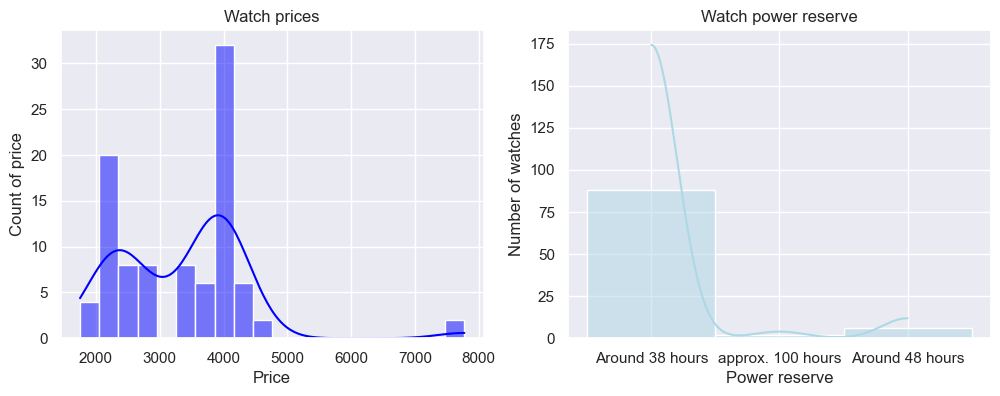

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid") #background


plt.figure(figsize=(12, 4))  # Adjust the figure size if necessary


plt.subplot(121) #1 row 3 columns 1 it's mean this picture put it in the first cell
sns.histplot(df['price'], bins=20, kde=True, color='Blue')
plt.title('Watch prices')
plt.xlabel('Price')
plt.ylabel('Count of price')


plt.subplot(122) #1 row 3 columns 1 it's mean this picture put it in the second cell
sns.histplot(df['power_reserve'], bins=1, kde=True, color='lightblue')
plt.title('Watch power reserve')
plt.xlabel('Power reserve')
plt.ylabel('Number of watches')

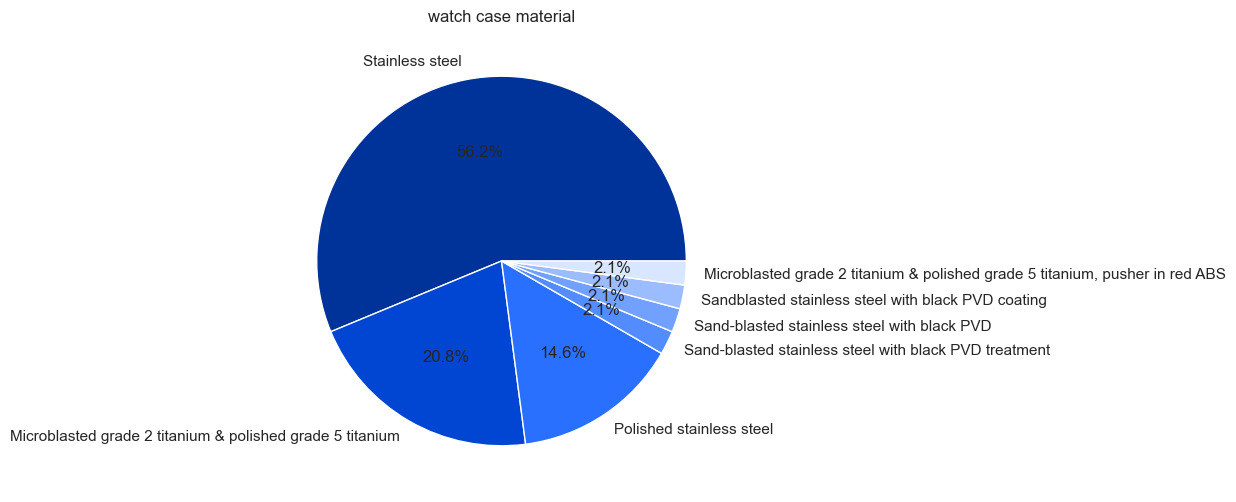

In [9]:
case_material_counts = df['case_material'].value_counts()

# Get the case material labels and counts
case_material_labels = case_material_counts.index.tolist()
case_material_values = case_material_counts.values.tolist()
color= ['#003399','#0046D2','#2970FF','#538CFF','#71A0FF','#9BBCFF','#D9E6FF']
# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size if necessary
plt.pie(case_material_values, labels=case_material_labels, autopct='%1.1f%%',colors=color)
plt.title('watch case material')


# Display the chart
plt.show()

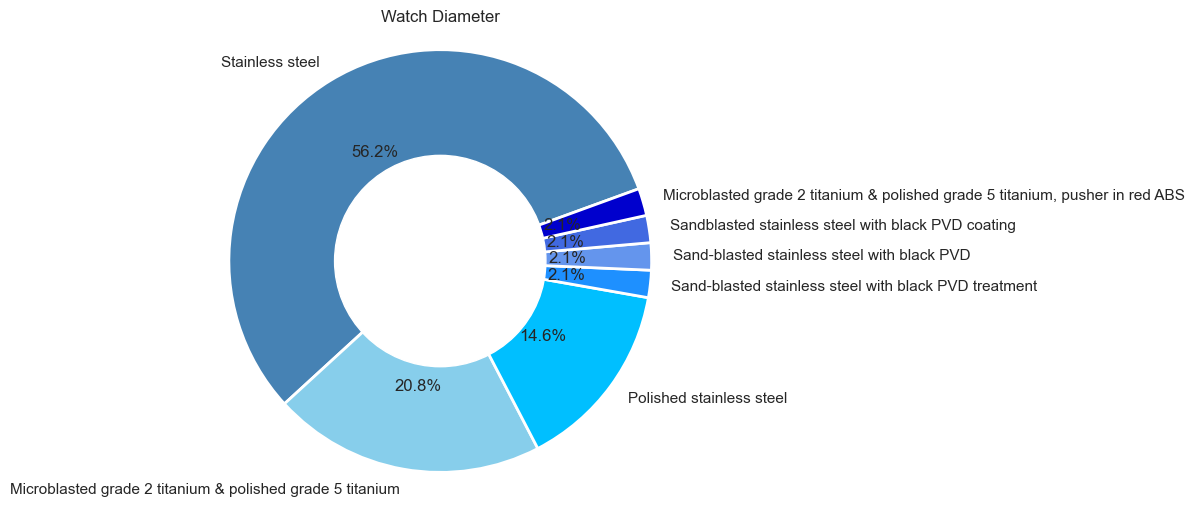

In [10]:
diameter_counts = df['diameter'].value_counts()

diameter_labels = diameter_counts.index.tolist()
diameter_values = diameter_counts.values.tolist()

blue_colors = ['steelblue', 'skyblue', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'mediumblue']

#doughnat
plt.figure(figsize=(6, 6))
plt.pie(case_material_values, labels=case_material_labels, autopct='%1.1f%%', colors=blue_colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2}, startangle=20)

#the circle in the midle
center_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that the circle is not distorted
plt.axis('equal')


plt.title('Watch Diameter')

plt.show()